# NAME: DIPTYO JYOTI BHATTACHARJEE

# PROJECT: HEALTH CARE

# PROJECT OBJECTIVE:
##   1. Exploring & Analyzing the given Dataset using proper EDA method.
##   2. Visualizing the cleaned Data.
##   3. Creating New Features & standardize or normalize the data using Feature Engineering method.
##   4. Building & Experimenting  with different Machine Learning Models and evaluate the model performance using appropriate metrics.
##   5. Perform Model Tuning methods to enhance the accuracy score then compare & evaluate the performance of model tuning.
##   6. Data Visualization with Power BI.

# Import all necessary Libraries

In [107]:
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

# Data Exploration & Cleaning

In [7]:
#importing the csv file to notebook
df=pd.read_csv('D:\DS & ML\PROJECT\Health care\covid_Dataset.csv')    

In [8]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,3,1,65,2,0,...,0,0,1,0,0,0,0,0,3,0
1,2,1,2,1,03-06-2020,3,1,72,3,0,...,0,0,1,0,0,1,1,0,5,0
2,2,1,2,2,09-06-2020,1,2,55,3,1,...,0,0,0,0,0,0,0,0,3,1
3,2,1,1,1,12-06-2020,3,2,53,2,0,...,0,0,0,0,0,0,0,0,7,0
4,2,1,2,1,21-06-2020,3,2,68,3,1,...,0,0,1,0,0,0,0,0,3,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 199999 non-null  int64 
 1   MEDICAL_UNIT          199999 non-null  int64 
 2   SEX                   199999 non-null  int64 
 3   PATIENT_TYPE          199999 non-null  int64 
 4   DATE_DIED             199999 non-null  object
 5   INTUBED               199999 non-null  int64 
 6   PNEUMONIA             199999 non-null  int64 
 7   AGE                   199999 non-null  int64 
 8   PREGNANT              199999 non-null  int64 
 9   DIABETES              199999 non-null  int64 
 10  COPD                  199999 non-null  int64 
 11  ASTHMA                199999 non-null  int64 
 12  INMSUPR               199999 non-null  int64 
 13  HIPERTENSION          199999 non-null  int64 
 14  OTHER_DISEASE         199999 non-null  int64 
 15  CARDIOVASCULAR   

In [14]:
#provding  basic statistics
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,1.560453,3.900170,1.523433,1.346587,2.578108,4.095105,45.317002,2.518763,0.172966,0.021925,0.031865,0.018795,0.224771,0.052340,0.025855,0.176846,0.032410,0.076065,4.006060,0.346587
std,0.496333,0.309976,0.499452,0.475884,0.656066,14.817906,17.262120,0.512581,0.378219,0.146439,0.175641,0.135801,0.417433,0.222713,0.158703,0.381539,0.177087,0.265103,1.517395,0.475884
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,32.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,2.000000,4.000000,2.000000,1.000000,3.000000,2.000000,44.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,2.000000,4.000000,2.000000,2.000000,3.000000,2.000000,57.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,2.000000,4.000000,2.000000,2.000000,4.000000,99.000000,107.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


In [16]:
#identifying the null values
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [18]:
#Identifying the dupicate values
df.duplicated().sum()

125590

In [20]:
#droping the dulicate values
df1 = df.drop_duplicates()

In [22]:
df1

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,3,1,65,2,0,...,0,0,1,0,0,0,0,0,3,0
1,2,1,2,1,03-06-2020,3,1,72,3,0,...,0,0,1,0,0,1,1,0,5,0
2,2,1,2,2,09-06-2020,1,2,55,3,1,...,0,0,0,0,0,0,0,0,3,1
3,2,1,1,1,12-06-2020,3,2,53,2,0,...,0,0,0,0,0,0,0,0,7,0
4,2,1,2,1,21-06-2020,3,2,68,3,1,...,0,0,1,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199978,1,4,2,2,9999-99-99,2,2,61,3,0,...,0,0,1,0,0,0,0,0,6,1
199982,1,4,2,1,9999-99-99,3,2,55,3,0,...,0,0,1,1,0,0,0,0,6,0
199986,2,4,2,2,9999-99-99,2,2,54,3,0,...,0,0,0,1,0,0,0,0,6,1
199993,1,4,2,1,9999-99-99,3,2,66,3,0,...,0,0,1,0,1,0,0,0,6,0


In [24]:
df1.duplicated().sum()

0

In [26]:
df1.count()

USMER                   74409
MEDICAL_UNIT            74409
SEX                     74409
PATIENT_TYPE            74409
DATE_DIED               74409
INTUBED                 74409
PNEUMONIA               74409
AGE                     74409
PREGNANT                74409
DIABETES                74409
COPD                    74409
ASTHMA                  74409
INMSUPR                 74409
HIPERTENSION            74409
OTHER_DISEASE           74409
CARDIOVASCULAR          74409
OBESITY                 74409
RENAL_CHRONIC           74409
TOBACCO                 74409
CLASIFFICATION_FINAL    74409
ICU                     74409
dtype: int64

In [28]:
df1.to_csv('clean_data.csv', index=False)

# Data Visualization

## Creating Histogram & Boxplot

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

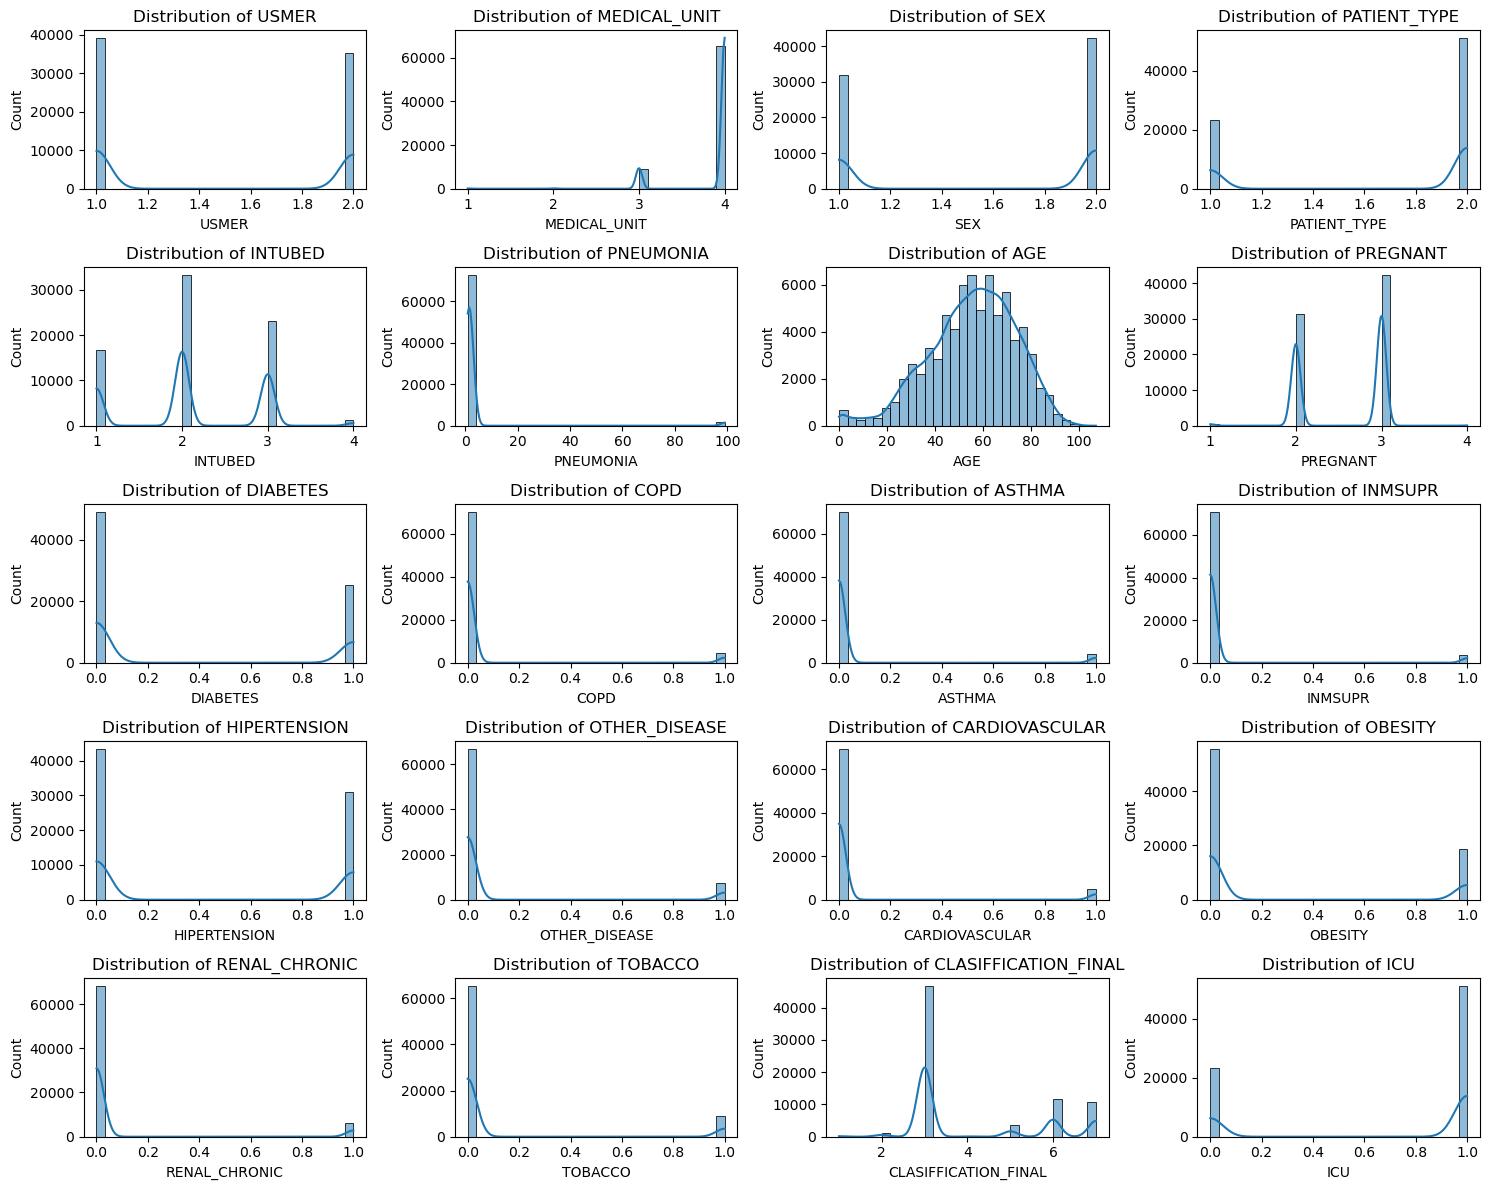

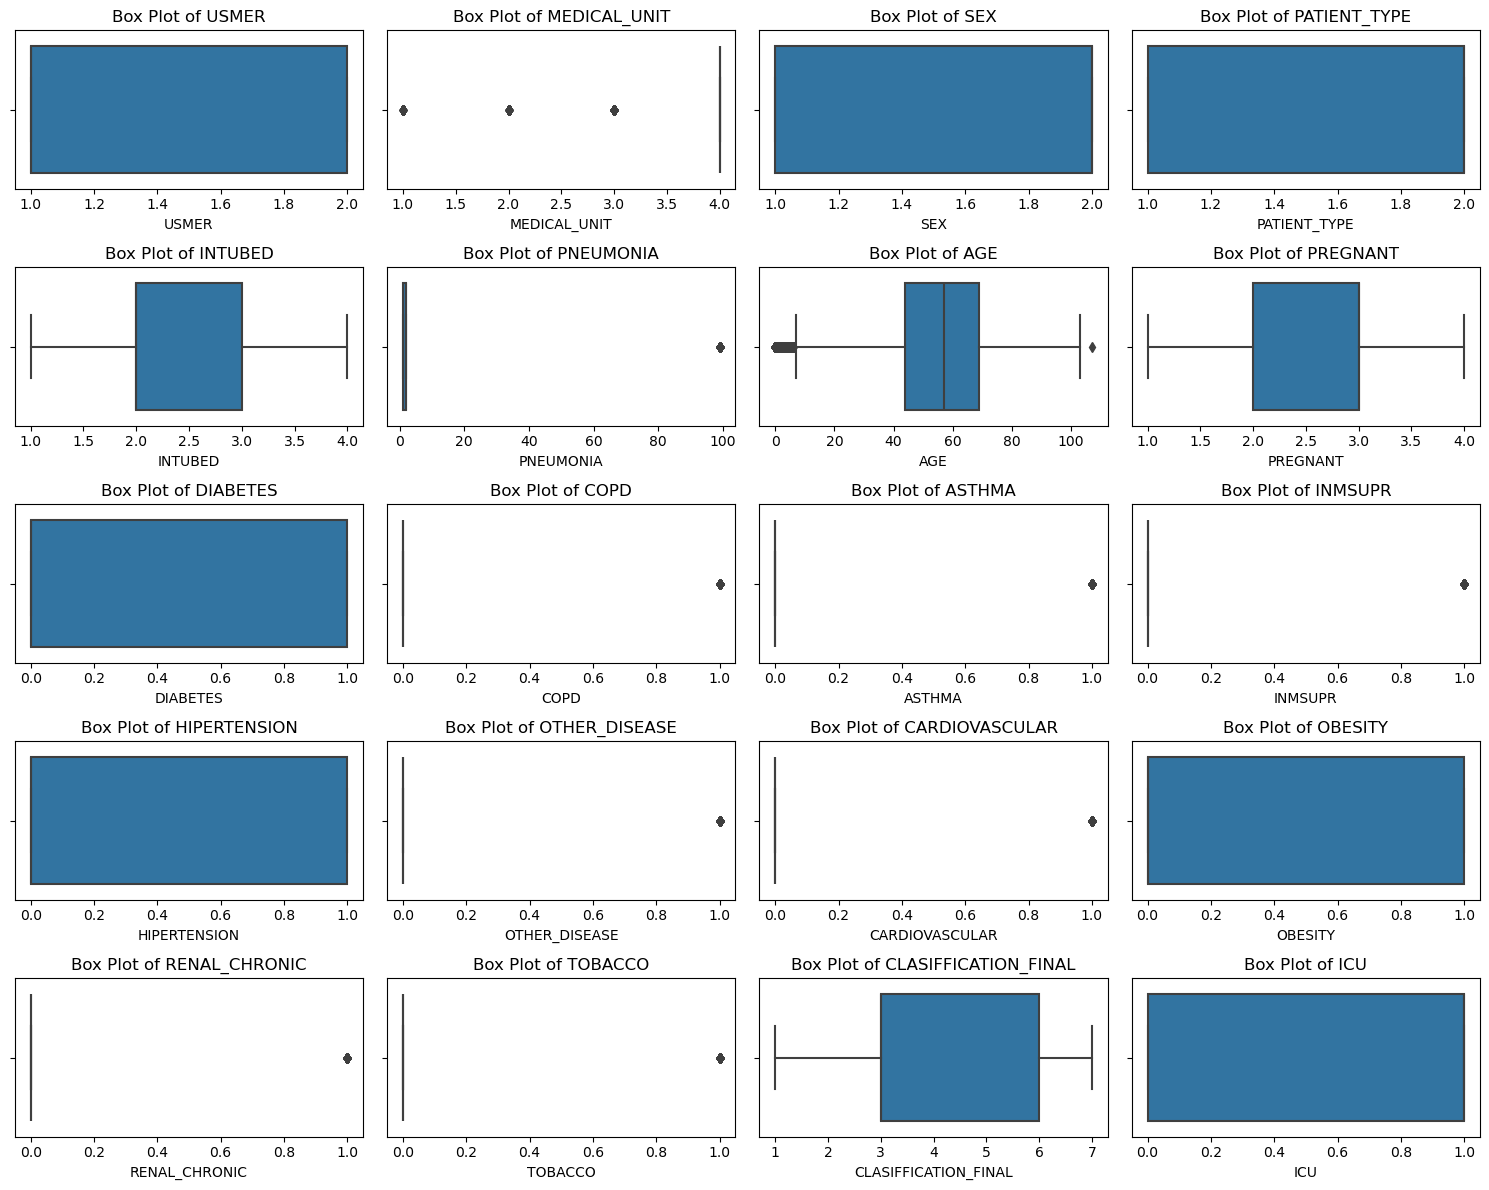

In [55]:
# Select numerical columns (excluding DATE_DIED)
numerical_cols = df1.select_dtypes(include=['int64']).columns

# Set figure size
plt.figure(figsize=(15, 12))

# Create histograms
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df1[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Set figure size for box plots
plt.figure(figsize=(15, 12))

# Create box plots
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x=df1[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


## Creating Bar charts & Pie chart

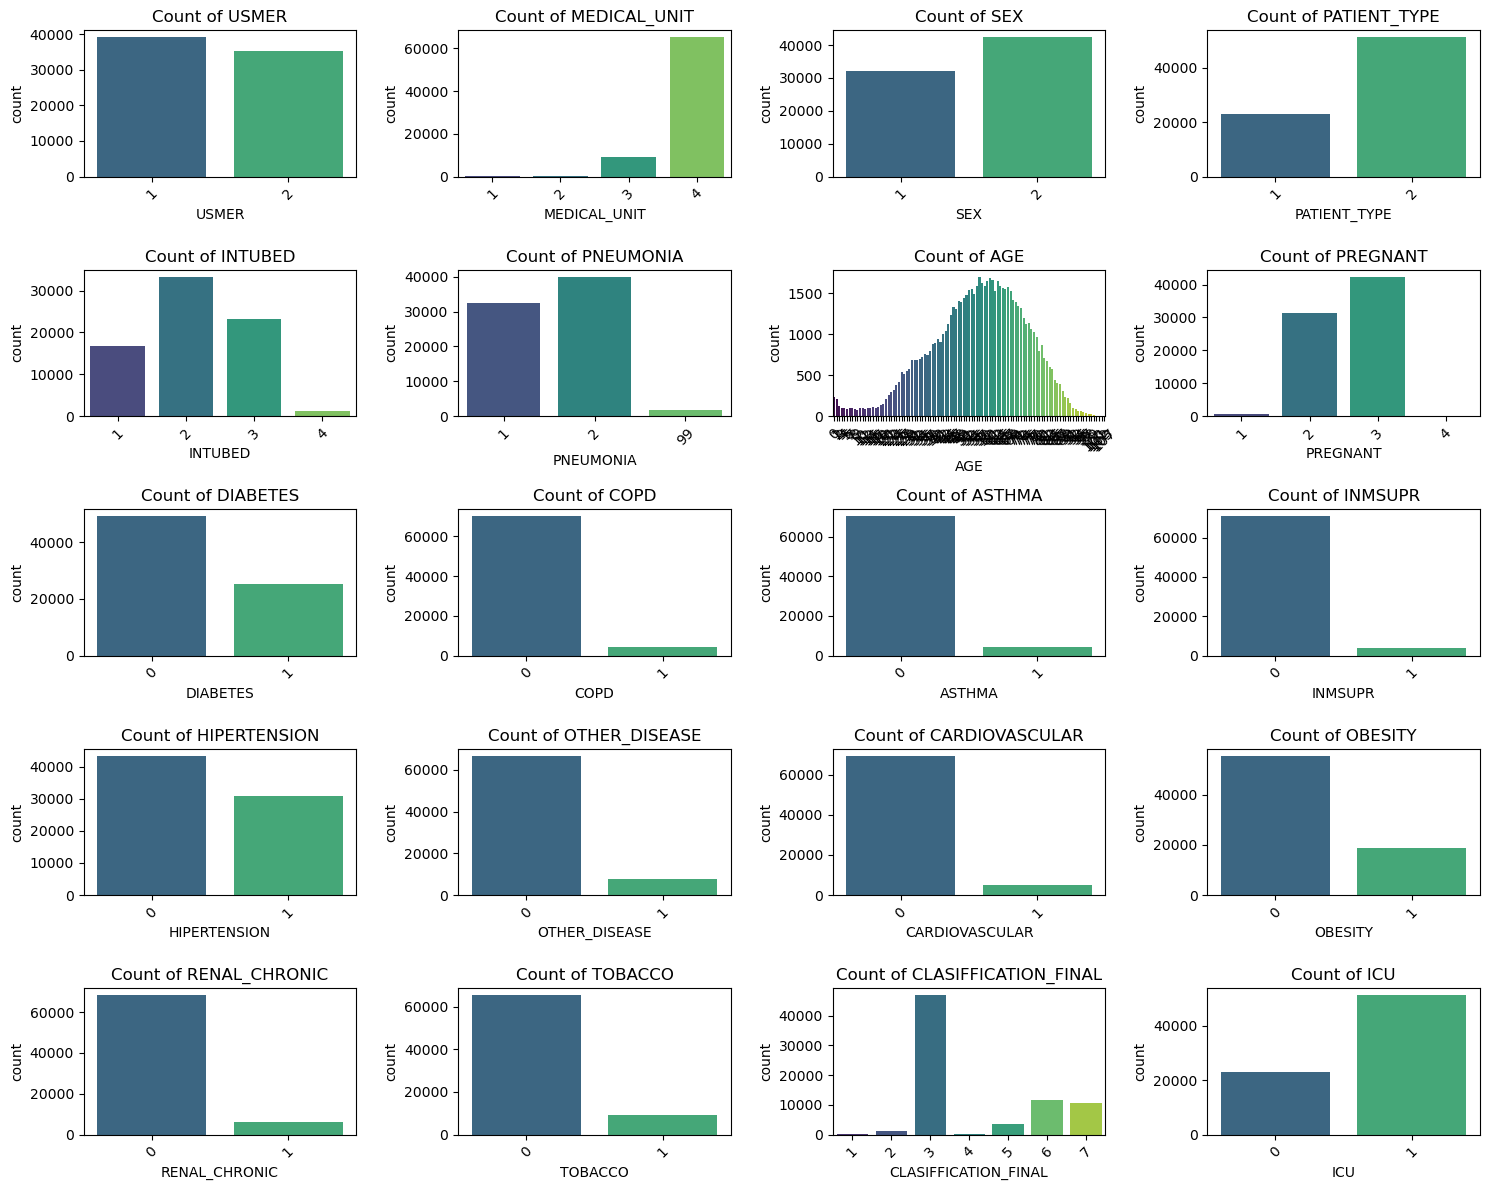

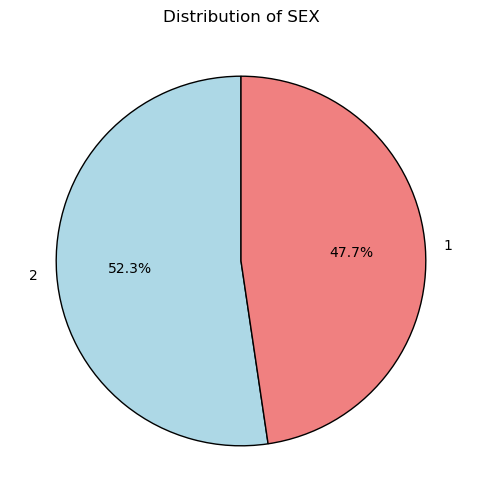

In [57]:
# Set figure size for bar charts
plt.figure(figsize=(15, 12))

# Create bar charts for categorical variables
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.countplot(x=df1[col], palette="viridis")
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Select a key categorical column for pie chart (e.g., SEX distribution)
plt.figure(figsize=(6, 6))
df['SEX'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of SEX")
plt.ylabel('')  # Hide y-label for better visualization
plt.show()


## Creating Correlation Heatmap of Numerical Features

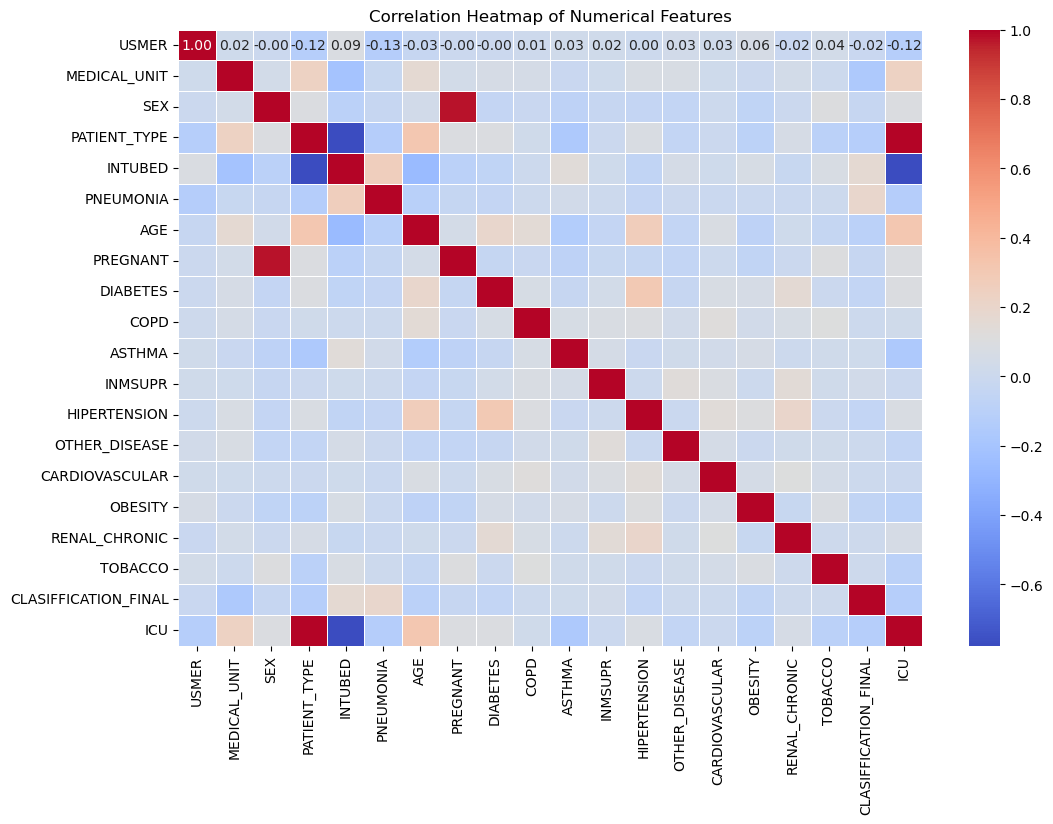

In [48]:
# Compute the correlation matrix
df_1 = df1.drop(columns=["DATE_DIED"])
correlation_matrix = df_1.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Heatmap of Numerical Features")

# Show plot
plt.show()


## Creating Pairplot to visualize relationship between Features

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

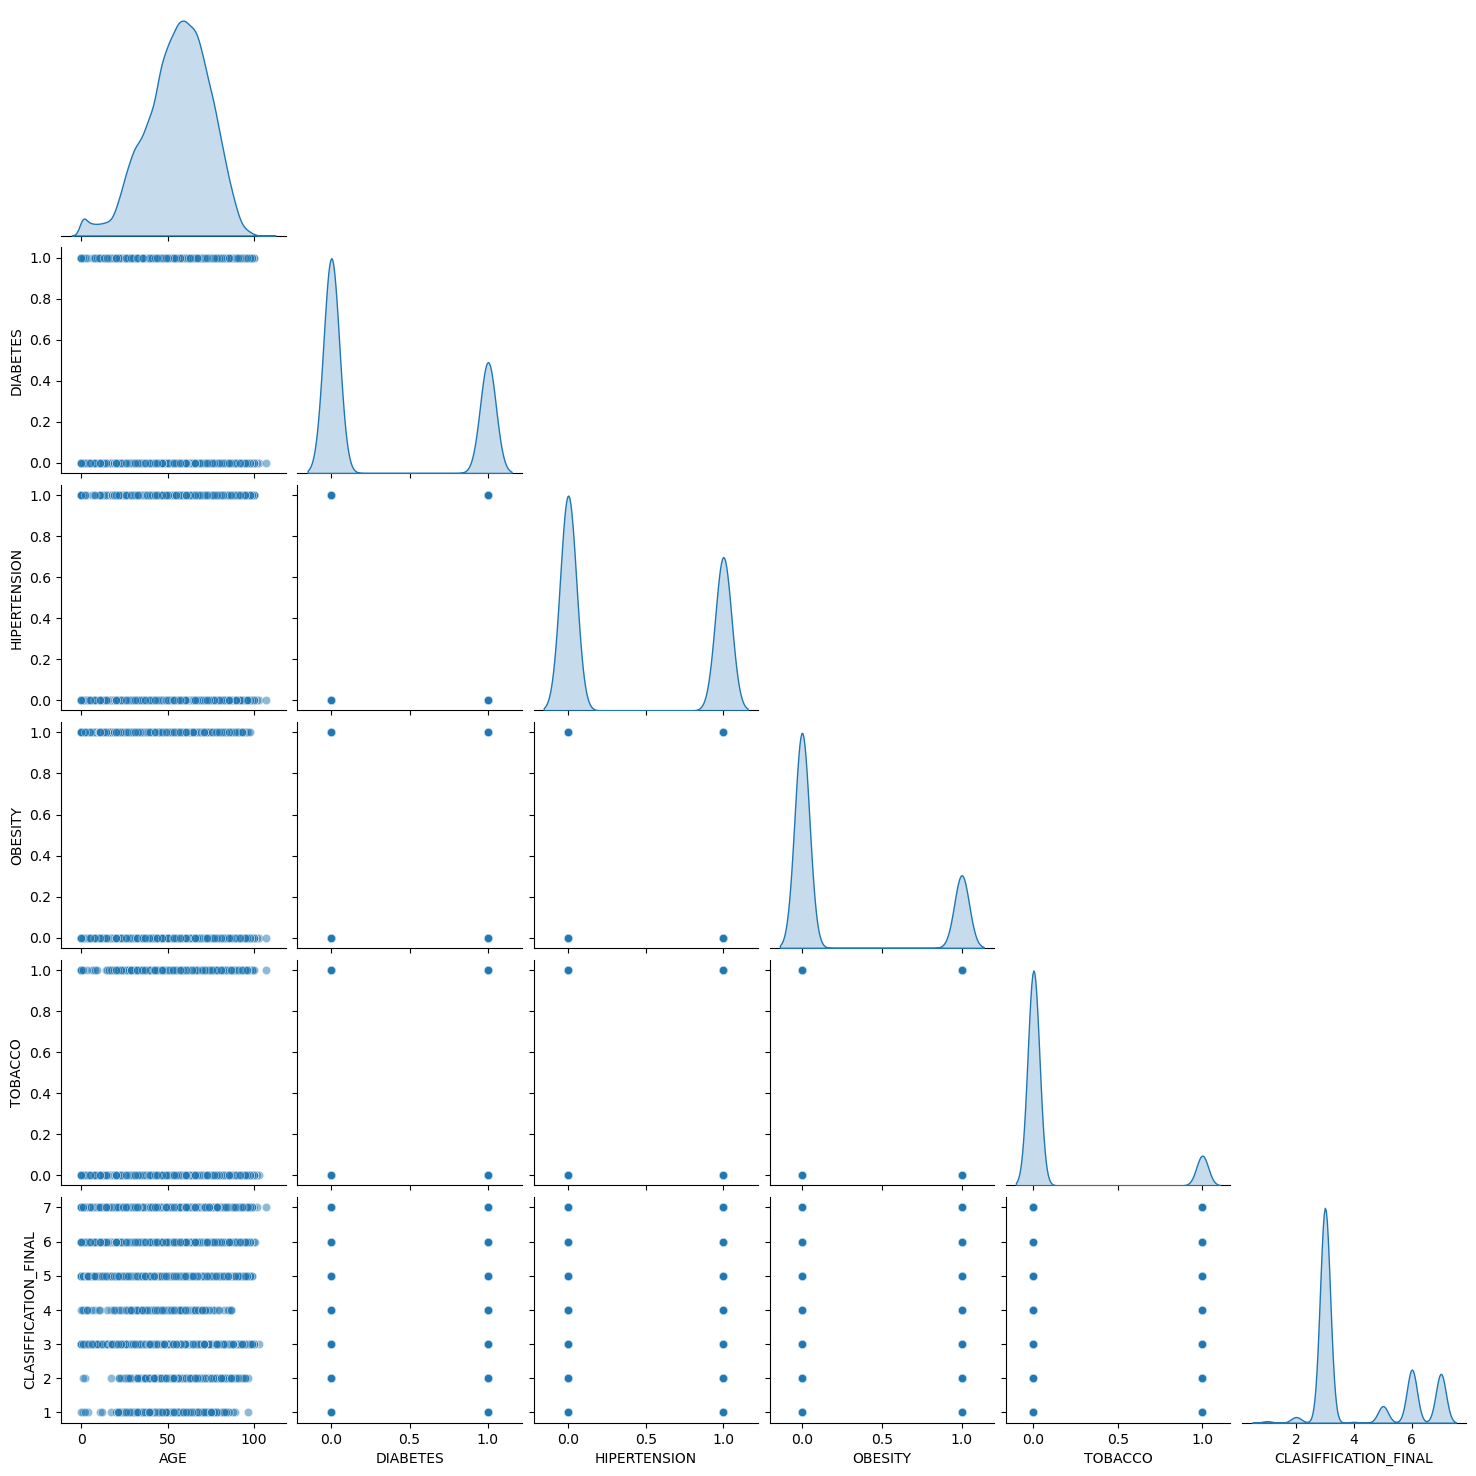

<class 'pandas.core.frame.DataFrame'>
Index: 74409 entries, 0 to 199996
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AGE                   74409 non-null  int64
 1   DIABETES              74409 non-null  int64
 2   HIPERTENSION          74409 non-null  int64
 3   OBESITY               74409 non-null  int64
 4   TOBACCO               74409 non-null  int64
 5   CLASIFFICATION_FINAL  74409 non-null  int64
dtypes: int64(6)
memory usage: 4.0 MB


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

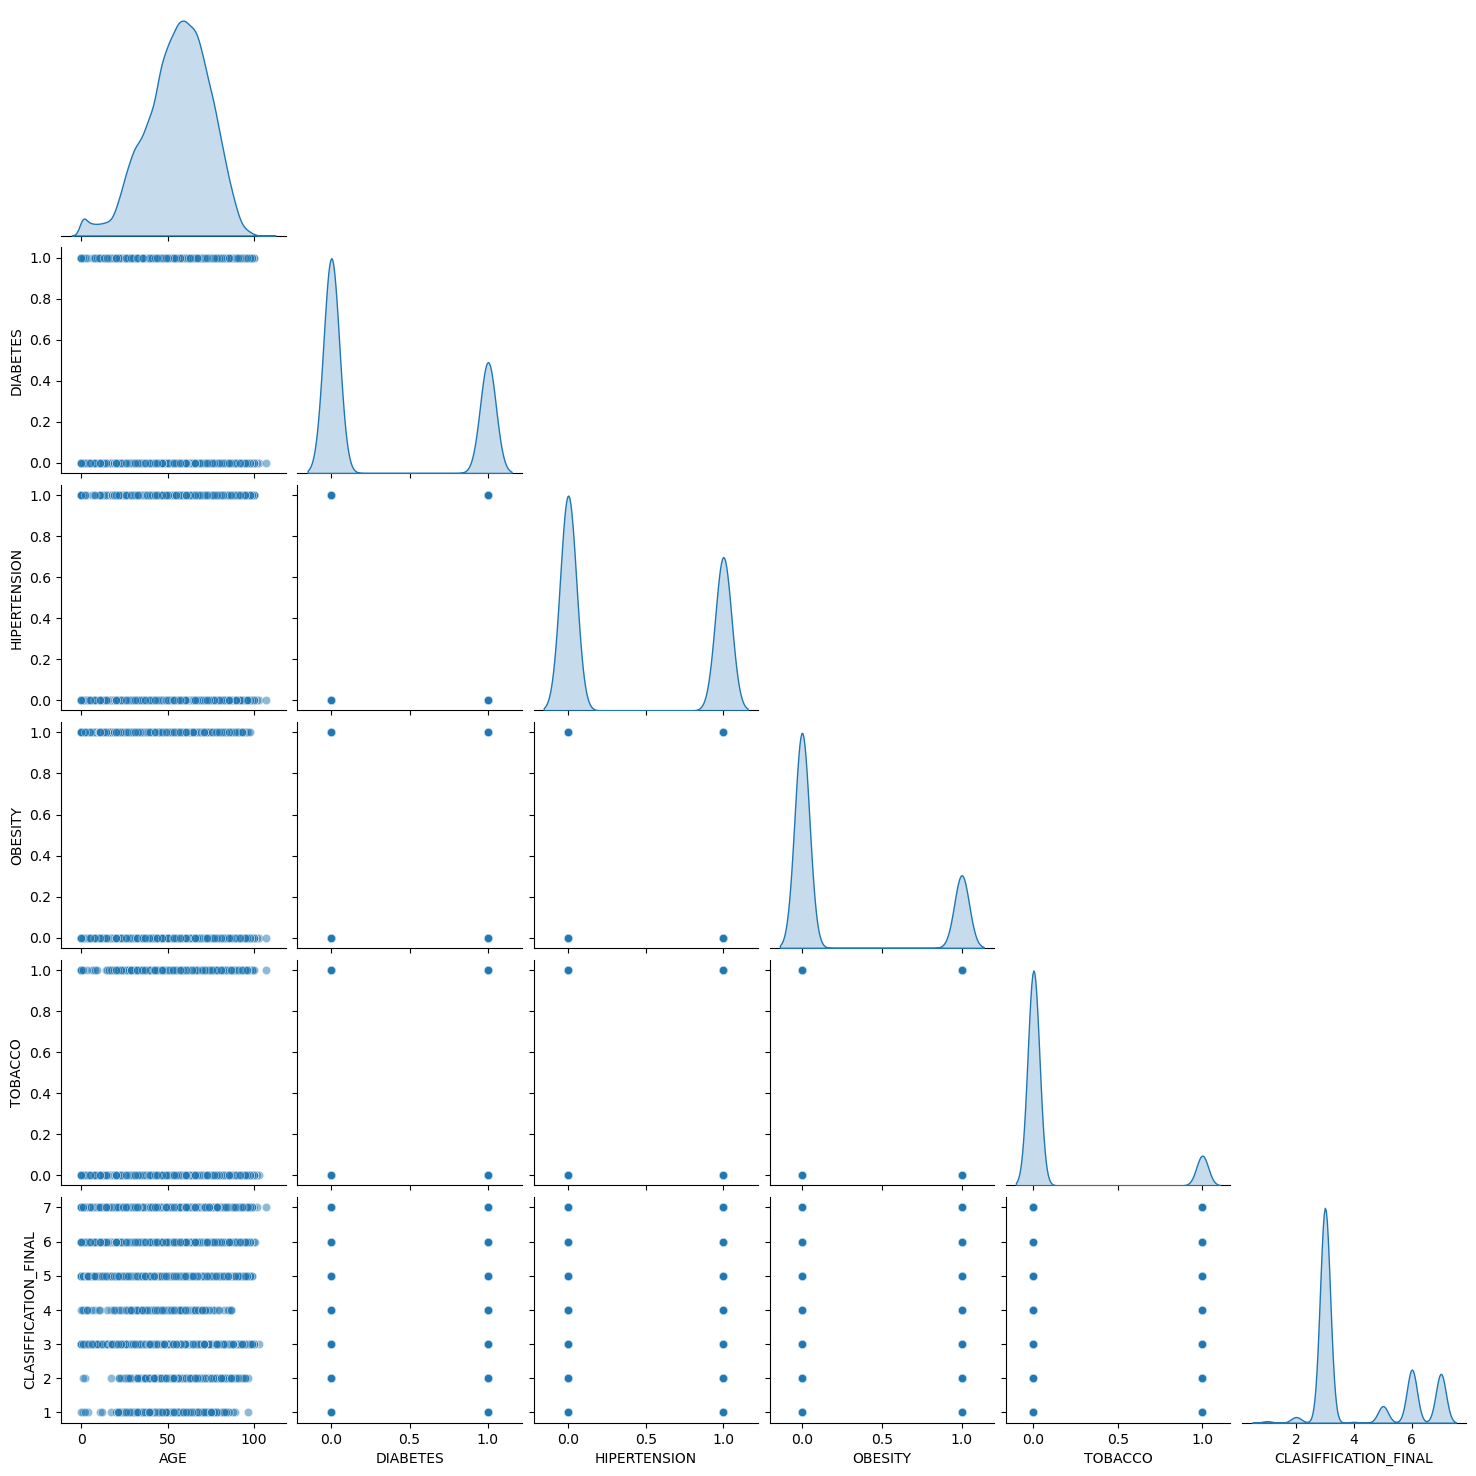

C:\Users\User\AppData\Local\Temp\ipykernel_22412\658983174.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[selected_cols] = df1[selected_cols].apply(pd.to_numeric, errors='coerce')
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: Futu

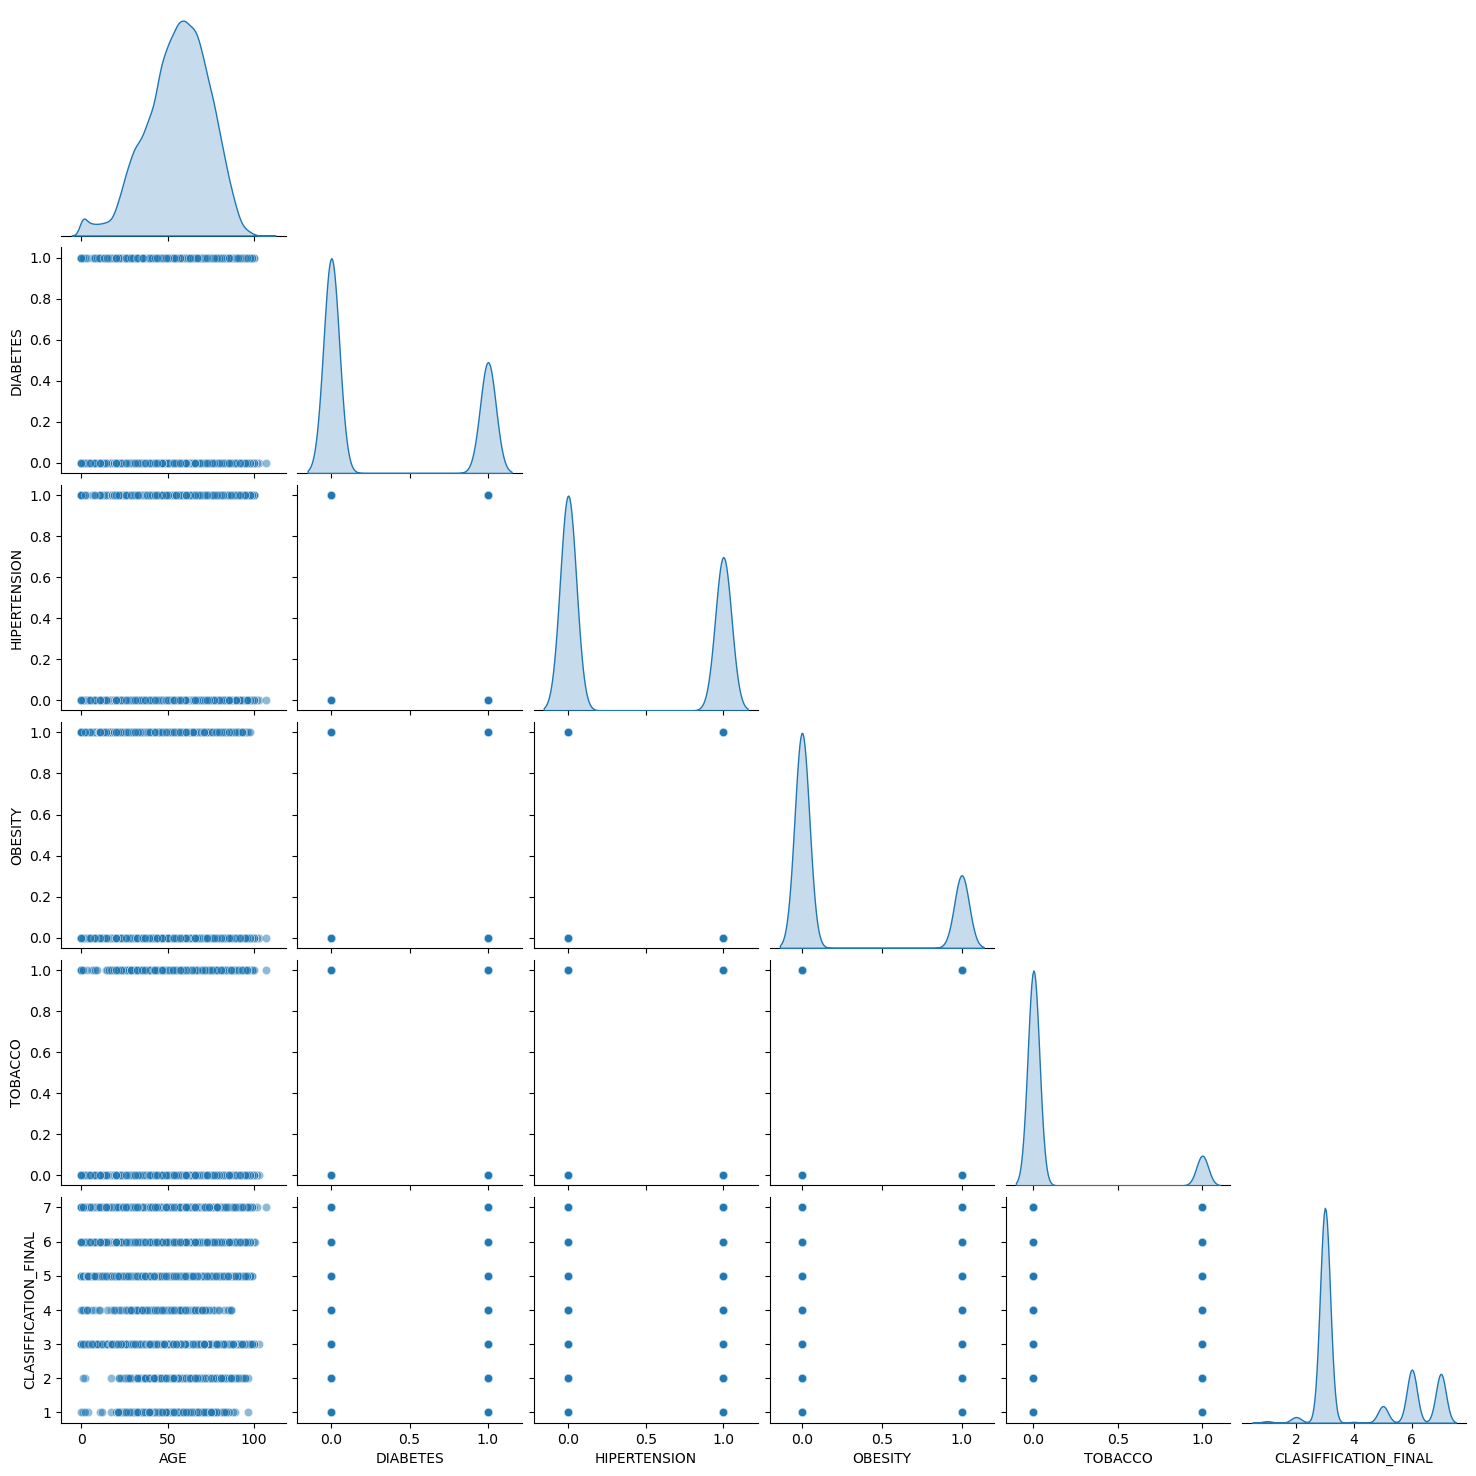

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

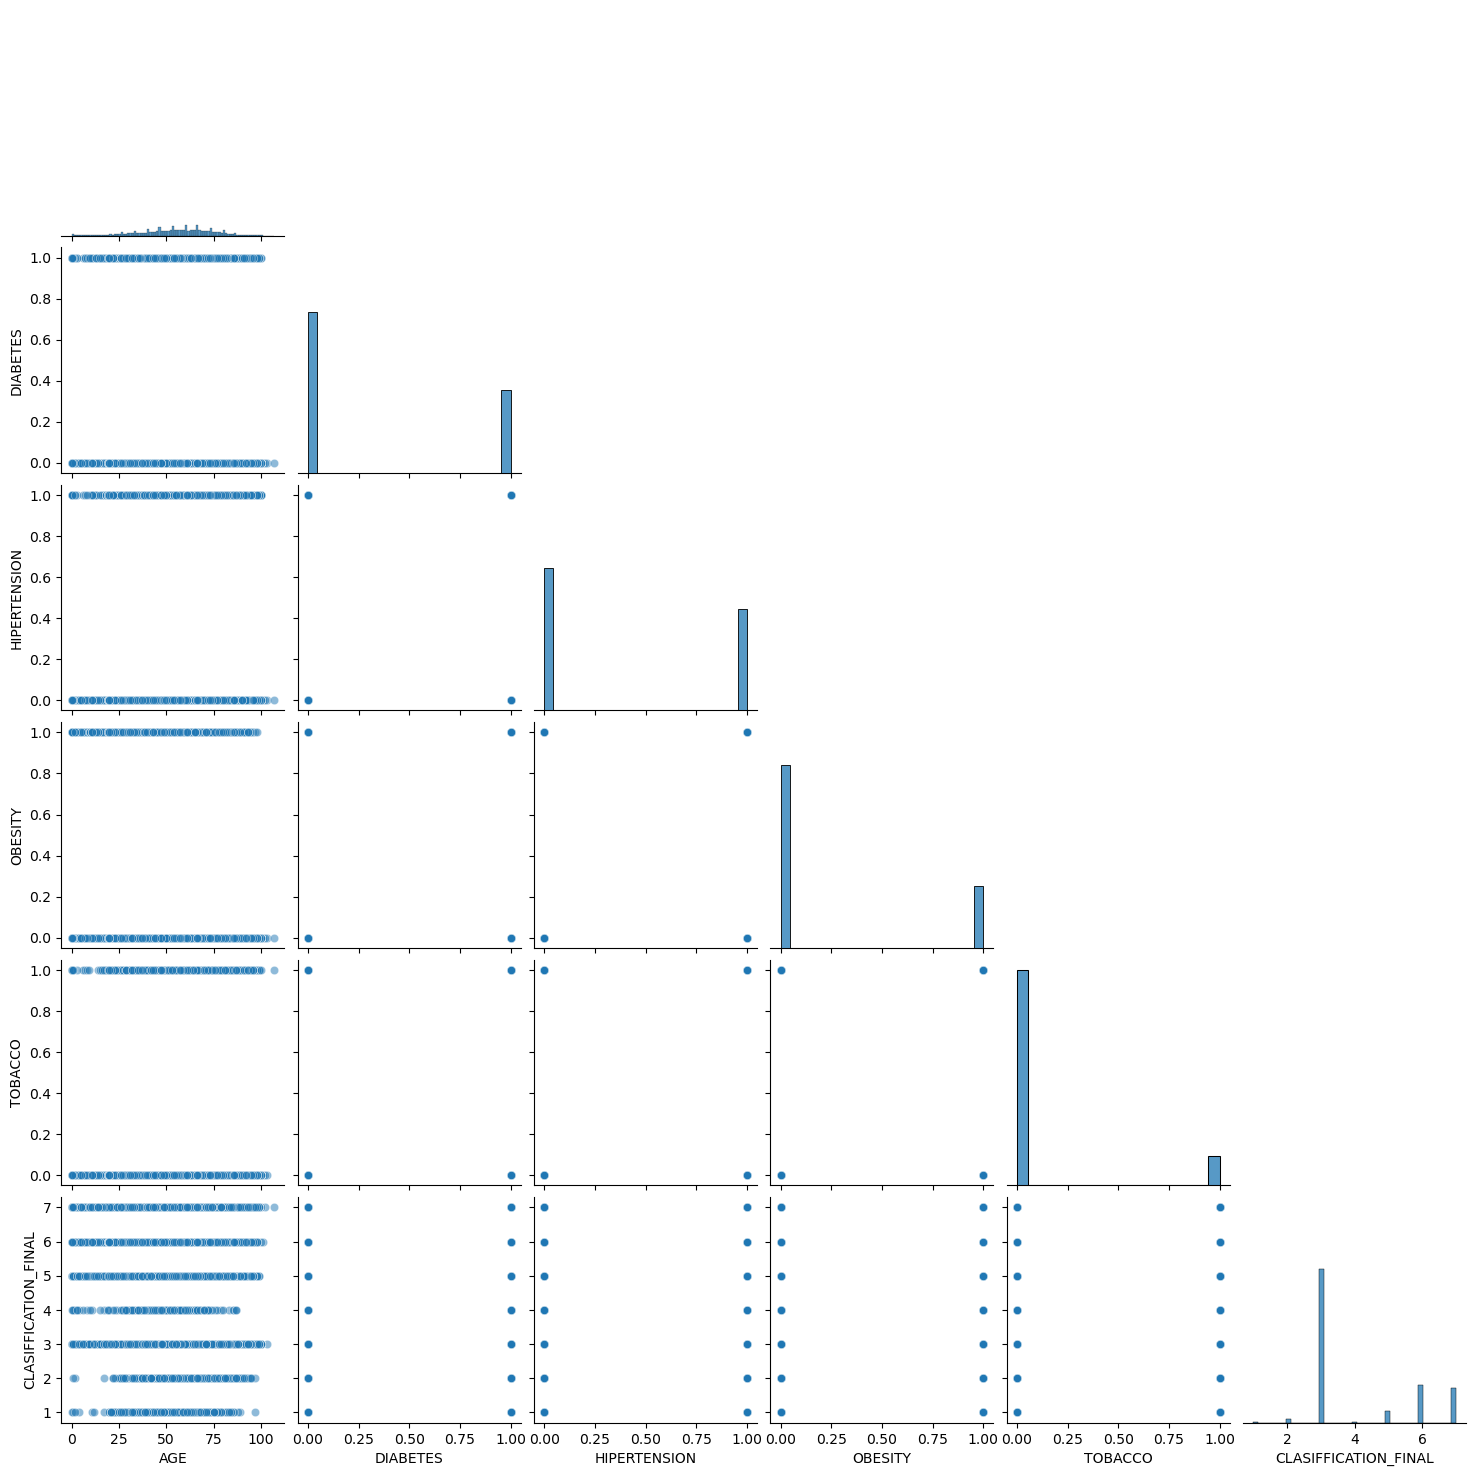

In [53]:
# Select a subset of numerical columns for the pair plot to avoid overcrowding
selected_cols = ['AGE', 'DIABETES', 'HIPERTENSION', 'OBESITY', 'TOBACCO', 'CLASIFFICATION_FINAL']

# Create pair plot
sns.pairplot(df1[selected_cols], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.show()

# Check for non-numeric or missing values in selected columns
df1[selected_cols].info(), df1[selected_cols].isna().sum()

# Create pair plot again after confirming data integrity
sns.pairplot(df1[selected_cols], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.show()

# Ensure all selected columns are explicitly numeric
df1[selected_cols] = df1[selected_cols].apply(pd.to_numeric, errors='coerce')

# Retry the pair plot
sns.pairplot(df1[selected_cols].dropna(), diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.show()

# Check unique values in each selected column
{col: df1[col].unique() for col in selected_cols}

# Create pair plot with histograms instead of KDE for diagonals
sns.pairplot(df1[selected_cols].dropna(), diag_kind='hist', corner=True, plot_kws={'alpha': 0.5})
plt.show()


In [61]:
df1

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,3,1,65,2,0,...,0,0,1,0,0,0,0,0,3,0
1,2,1,2,1,03-06-2020,3,1,72,3,0,...,0,0,1,0,0,1,1,0,5,0
2,2,1,2,2,09-06-2020,1,2,55,3,1,...,0,0,0,0,0,0,0,0,3,1
3,2,1,1,1,12-06-2020,3,2,53,2,0,...,0,0,0,0,0,0,0,0,7,0
4,2,1,2,1,21-06-2020,3,2,68,3,1,...,0,0,1,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199978,1,4,2,2,9999-99-99,2,2,61,3,0,...,0,0,1,0,0,0,0,0,6,1
199982,1,4,2,1,9999-99-99,3,2,55,3,0,...,0,0,1,1,0,0,0,0,6,0
199986,2,4,2,2,9999-99-99,2,2,54,3,0,...,0,0,0,1,0,0,0,0,6,1
199993,1,4,2,1,9999-99-99,3,2,66,3,0,...,0,0,1,0,1,0,0,0,6,0


In [63]:
df1.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

# Feature Engineering(Date-Time Features)

In [66]:
df1["DATE_DIED"] = pd.to_datetime(df1["DATE_DIED"], errors="coerce")

# Create date-related features
df1["DEATH_YEAR"] = df1["DATE_DIED"].dt.year
df1["DEATH_MONTH"] = df1["DATE_DIED"].dt.month
df1["DEATH_DAY_OF_WEEK"] = df1["DATE_DIED"].dt.dayofweek
df1["IS_WEEKEND"] = df1["DEATH_DAY_OF_WEEK"].isin([5, 6]).astype(int)


C:\Users\User\AppData\Local\Temp\ipykernel_22412\4009905685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["DATE_DIED"] = pd.to_datetime(df1["DATE_DIED"], errors="coerce")
C:\Users\User\AppData\Local\Temp\ipykernel_22412\4009905685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["DEATH_YEAR"] = df1["DATE_DIED"].dt.year
C:\Users\User\AppData\Local\Temp\ipykernel_22412\4009905685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [68]:
df1

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH_YEAR,DEATH_MONTH,DEATH_DAY_OF_WEEK,IS_WEEKEND
0,2,1,1,1,2020-03-05,3,1,65,2,0,...,0,0,0,0,3,0,2020.0,3.0,3.0,0
1,2,1,2,1,2020-03-06,3,1,72,3,0,...,0,1,1,0,5,0,2020.0,3.0,4.0,0
2,2,1,2,2,2020-09-06,1,2,55,3,1,...,0,0,0,0,3,1,2020.0,9.0,6.0,1
3,2,1,1,1,2020-12-06,3,2,53,2,0,...,0,0,0,0,7,0,2020.0,12.0,6.0,1
4,2,1,2,1,NaT,3,2,68,3,1,...,0,0,0,0,3,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199978,1,4,2,2,NaT,2,2,61,3,0,...,0,0,0,0,6,1,NaN,NaN,NaN,0
199982,1,4,2,1,NaT,3,2,55,3,0,...,0,0,0,0,6,0,NaN,NaN,NaN,0
199986,2,4,2,2,NaT,2,2,54,3,0,...,0,0,0,0,6,1,NaN,NaN,NaN,0
199993,1,4,2,1,NaT,3,2,66,3,0,...,1,0,0,0,6,0,NaN,NaN,NaN,0


# Feature Engineering(Interaction Features)

In [72]:
df1["AGE_DIABETES"] = df1["AGE"] * df1["DIABETES"]
df1["AGE_OBESITY"] = df1["AGE"] * df1["OBESITY"]
df1["DIABETES_HYPERTENSION"] = df1["DIABETES"] * df1["HIPERTENSION"]

C:\Users\User\AppData\Local\Temp\ipykernel_22412\3168566052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["AGE_DIABETES"] = df1["AGE"] * df1["DIABETES"]
C:\Users\User\AppData\Local\Temp\ipykernel_22412\3168566052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["AGE_OBESITY"] = df1["AGE"] * df1["OBESITY"]
C:\Users\User\AppData\Local\Temp\ipykernel_22412\3168566052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [74]:
df1

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH_YEAR,DEATH_MONTH,DEATH_DAY_OF_WEEK,IS_WEEKEND,AGE_DIABETES,AGE_OBESITY,DIABETES_HYPERTENSION
0,2,1,1,1,2020-03-05,3,1,65,2,0,...,0,3,0,2020.0,3.0,3.0,0,0,0,0
1,2,1,2,1,2020-03-06,3,1,72,3,0,...,0,5,0,2020.0,3.0,4.0,0,0,72,0
2,2,1,2,2,2020-09-06,1,2,55,3,1,...,0,3,1,2020.0,9.0,6.0,1,55,0,0
3,2,1,1,1,2020-12-06,3,2,53,2,0,...,0,7,0,2020.0,12.0,6.0,1,0,0,0
4,2,1,2,1,NaT,3,2,68,3,1,...,0,3,0,NaN,NaN,NaN,0,68,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199978,1,4,2,2,NaT,2,2,61,3,0,...,0,6,1,NaN,NaN,NaN,0,0,0,0
199982,1,4,2,1,NaT,3,2,55,3,0,...,0,6,0,NaN,NaN,NaN,0,0,0,0
199986,2,4,2,2,NaT,2,2,54,3,0,...,0,6,1,NaN,NaN,NaN,0,0,0,0
199993,1,4,2,1,NaT,3,2,66,3,0,...,0,6,0,NaN,NaN,NaN,0,0,0,0


## Standardization of Numerical Features

In [77]:

# Select numerical features to scale (excluding categorical/binary variables)
numerical_features = ["AGE", "DEATH_YEAR", "DEATH_MONTH", "AGE_DIABETES", "AGE_OBESITY"]

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
df_standardized = df1.copy()
df_standardized[numerical_features] = scaler_standard.fit_transform(df1[numerical_features])

df_standardized.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH_YEAR,DEATH_MONTH,DEATH_DAY_OF_WEEK,IS_WEEKEND,AGE_DIABETES,AGE_OBESITY,DIABETES_HYPERTENSION
0,2,1,1,1,2020-03-05,3,1,0.522475,2,0,...,0,3,0,-0.058319,-1.047574,3.0,0,-0.690941,-0.550652,0
1,2,1,2,1,2020-03-06,3,1,0.910592,3,0,...,0,5,0,-0.058319,-1.047574,4.0,0,-0.690941,2.408214,0
2,2,1,2,2,2020-09-06,1,2,-0.031977,3,1,...,0,3,1,-0.058319,0.687411,6.0,1,1.158385,-0.550652,0
3,2,1,1,1,2020-12-06,3,2,-0.142867,2,0,...,0,7,0,-0.058319,1.554903,6.0,1,-0.690941,-0.550652,0
4,2,1,2,1,NaT,3,2,0.688811,3,1,...,0,3,0,NaN,NaN,NaN,0,1.595498,-0.550652,1


## Normalization of Numerical Features

In [80]:
# Normalization (Min-Max scaling)
scaler_minmax = MinMaxScaler()
df_normalized = df1.copy()
df_normalized[numerical_features] = scaler_minmax.fit_transform(df1[numerical_features])

# Display the first few rows after transformation
df_normalized.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH_YEAR,DEATH_MONTH,DEATH_DAY_OF_WEEK,IS_WEEKEND,AGE_DIABETES,AGE_OBESITY,DIABETES_HYPERTENSION
0,2,1,1,1,2020-03-05,3,1,0.607477,2,0,...,0,3,0,0.0,0.181818,3.0,0,0.00,0.000000,0
1,2,1,2,1,2020-03-06,3,1,0.672897,3,0,...,0,5,0,0.0,0.181818,4.0,0,0.00,0.734694,0
2,2,1,2,2,2020-09-06,1,2,0.514019,3,1,...,0,3,1,0.0,0.727273,6.0,1,0.55,0.000000,0
3,2,1,1,1,2020-12-06,3,2,0.495327,2,0,...,0,7,0,0.0,1.000000,6.0,1,0.00,0.000000,0
4,2,1,2,1,NaT,3,2,0.635514,3,1,...,0,3,0,NaN,NaN,NaN,0,0.68,0.000000,1


In [82]:
df1

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH_YEAR,DEATH_MONTH,DEATH_DAY_OF_WEEK,IS_WEEKEND,AGE_DIABETES,AGE_OBESITY,DIABETES_HYPERTENSION
0,2,1,1,1,2020-03-05,3,1,65,2,0,...,0,3,0,2020.0,3.0,3.0,0,0,0,0
1,2,1,2,1,2020-03-06,3,1,72,3,0,...,0,5,0,2020.0,3.0,4.0,0,0,72,0
2,2,1,2,2,2020-09-06,1,2,55,3,1,...,0,3,1,2020.0,9.0,6.0,1,55,0,0
3,2,1,1,1,2020-12-06,3,2,53,2,0,...,0,7,0,2020.0,12.0,6.0,1,0,0,0
4,2,1,2,1,NaT,3,2,68,3,1,...,0,3,0,NaN,NaN,NaN,0,68,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199978,1,4,2,2,NaT,2,2,61,3,0,...,0,6,1,NaN,NaN,NaN,0,0,0,0
199982,1,4,2,1,NaT,3,2,55,3,0,...,0,6,0,NaN,NaN,NaN,0,0,0,0
199986,2,4,2,2,NaT,2,2,54,3,0,...,0,6,1,NaN,NaN,NaN,0,0,0,0
199993,1,4,2,1,NaT,3,2,66,3,0,...,0,6,0,NaN,NaN,NaN,0,0,0,0


# Model Building

## Why use classification?
## because the target variable is an integer (1 to 7) doesn’t automatically mean we should use regression. The choice between classification and regression depends on whether the integers represent categories (discrete labels) or continuous values.

## Train Test Split & Logistic Regression Model Building

In [87]:
# Drop DATE_DIED and related features with excessive missing values
df_cleaned = df1.drop(columns=["DATE_DIED", "DEATH_YEAR", "DEATH_MONTH", "DEATH_DAY_OF_WEEK"])

# Define new feature set and target
features = df_cleaned.drop(columns=["CLASIFFICATION_FINAL"])
target = df_cleaned["CLASIFFICATION_FINAL"]

# Split the dataset again (80% training, 20% testing) with stratification
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Train the logistic regression model again
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6436634860905792

## Evaluating the Model Performance

In [92]:
# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00       249
           3       0.65      0.98      0.78      9357
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00       726
           6       0.67      0.10      0.17      2316
           7       0.43      0.07      0.13      2131

    accuracy                           0.64     14882
   macro avg       0.25      0.17      0.15     14882
weighted avg       0.57      0.64      0.54     14882



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Experiment with Decision Tree, Random Forest & K-Nearest Neighbor model

In [96]:
#Decision Tree Model

# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)

# Train models
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.5192178470635668

In [98]:
#Random Forest Model

# Initialize models
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.5444160731084532

In [100]:
#K-Nearest Neighbor model

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)

# Train models
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
accuracy

0.5930654481924472

In [102]:
# Performance Evaluation of models
report1 = classification_report(y_test, y_pred_dt)
print(f"Decision Tree Performance:\n{report1}")

report2 = classification_report(y_test, y_pred_rf)
print(f"Random Forest Performance:\n{report2}")

report3 = classification_report(y_test, y_pred_knn)
print(f"K nearest Neighbor Performance:\n{report3}")

Decision Tree Performance:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.01      0.01      0.01       249
           3       0.64      0.74      0.69      9357
           4       0.00      0.00      0.00        36
           5       0.04      0.03      0.03       726
           6       0.23      0.16      0.18      2316
           7       0.27      0.18      0.22      2131

    accuracy                           0.52     14882
   macro avg       0.17      0.16      0.16     14882
weighted avg       0.48      0.52      0.49     14882

Random Forest Performance:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.02      0.00      0.01       249
           3       0.65      0.78      0.71      9357
           4       0.00      0.00      0.00        36
           5       0.03      0.02      0.02       726
           6       0.23 

# Model Tuning (Hyper Parameter Tuning using RandomizedsearchCV)

In [109]:
# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=10,  # Number of random combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get best parameters
print("Best Hyperparameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}


## Evaluating & Comparing Tuned Model

In [112]:
# Get the best tuned model
best_rf = random_search.best_estimator_

# Predict on test data
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate performance
print("Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))

# Baseline model for comparison (Default Random Forest)
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train, y_train)
y_pred_baseline_rf = baseline_rf.predict(X_test)

# Evaluate baseline model
print("Baseline Random Forest Performance:")
print(classification_report(y_test, y_pred_baseline_rf))

# Compare accuracy
tuned_accuracy = accuracy_score(y_test, y_pred_best_rf)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline_rf)

print(f"Tuned Random Forest Accuracy: {tuned_accuracy}")
print(f"Baseline Random Forest Accuracy: {baseline_accuracy}")


Tuned Random Forest Performance:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00       249
           3       0.65      0.99      0.78      9357
           4       0.00      0.00      0.00        36
           5       0.50      0.01      0.02       726
           6       0.86      0.09      0.17      2316
           7       0.58      0.08      0.15      2131

    accuracy                           0.65     14882
   macro avg       0.37      0.17      0.16     14882
weighted avg       0.65      0.65      0.54     14882



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Baseline Random Forest Performance:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.02      0.00      0.01       249
           3       0.65      0.78      0.71      9357
           4       0.00      0.00      0.00        36
           5       0.03      0.02      0.02       726
           6       0.23      0.16      0.19      2316
           7       0.28      0.19      0.23      2131

    accuracy                           0.54     14882
   macro avg       0.17      0.17      0.17     14882
weighted avg       0.49      0.54      0.51     14882

Tuned Random Forest Accuracy: 0.6509205751915065
Baseline Random Forest Accuracy: 0.5444160731084532


# Conclusion

## This project successfully analyzed a healthcare dataset, applied machine learning techniques, and visualized key findings. The implementation of feature engineering, model selection, and tuning helped improve model accuracy. These insights can be valuable for healthcare decision-making and predictive analytics.